# Riemann Problem

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from kuibit.simdir import SimDir
from kuibit.grid_data import UniformGrid

## Exact Solution

In [2]:
#initial data from the Exact Riemann solver of https://www.brunogiacomazzo.org/?page_id=395
exact = np.loadtxt("Sod_exact.dat")

In [3]:
x_exact=exact[:,0]
rho_exact=exact[:,1]
press_exact=exact[:,2] #note: this is pgas+pmag
vx_exact=exact[:,3]
vy_exact=exact[:,4]
vz_exact=exact[:,5]
By_exact=exact[:,6]
Bz_exact=exact[:,7]

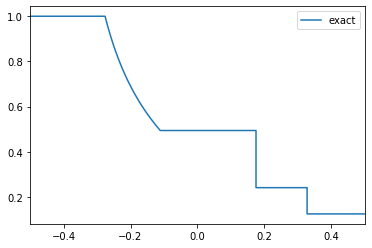

In [4]:
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()

## Read the Numerical Results

In [5]:
gf= SimDir("./Sod_1d_400/").gf
print(gf)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']


Available grid data of dimension 1D (y): 
['vel[2]', 'w_lorentz', 'scon[2]', 'rho', 'dens', 'scon[1]', 'vel[1]', 'tau', 'eps', 'vel[0]', 'scon[0]', 'press']


Available grid data of dimension 1D (z): 
['vel[0]', 'vel[1]', 'tau', 'vel[2]', 'press', 'rho', 'scon[1]', 'scon[2]', 'scon[0]', 'eps', 'w_lorentz', 'dens']


Available grid data of dimension 2D (xy): 
[]


Available grid data of dimension 2D (xz): 
[]


Available grid data of dimension 2D (yz): 
[]


Available grid data of dimension 3D (xyz): 
[]



In [6]:
vars1d=gf.x
print(vars1d)


Available grid data of dimension 1D (x): 
['tau', 'vel[2]', 'vel[0]', 'eps', 'w_lorentz', 'press', 'scon[2]', 'scon[1]', 'rho', 'scon[0]', 'dens', 'vel[1]']



In [7]:
rho=vars1d.fields.rho

## Kuibit Standard Methods for Plots

We create a uniform grid and plot the data on it. Kuibit indeed assumes that data were produced on a grid with several meshes (AMR). In our case the grid was already uniform, so later we will see an alternative way to plot the data without interpolating them on a new grid.

In [8]:
small_grid = UniformGrid([101], x0=[-0.45], x1=[0.45])

In [9]:
print(rho.iterations)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [10]:
rho_final = rho.read_on_grid(200, small_grid)

In [11]:
print(*rho_final.coordinates_meshgrid())

[-4.50000000e-01 -4.41000000e-01 -4.32000000e-01 -4.23000000e-01
 -4.14000000e-01 -4.05000000e-01 -3.96000000e-01 -3.87000000e-01
 -3.78000000e-01 -3.69000000e-01 -3.60000000e-01 -3.51000000e-01
 -3.42000000e-01 -3.33000000e-01 -3.24000000e-01 -3.15000000e-01
 -3.06000000e-01 -2.97000000e-01 -2.88000000e-01 -2.79000000e-01
 -2.70000000e-01 -2.61000000e-01 -2.52000000e-01 -2.43000000e-01
 -2.34000000e-01 -2.25000000e-01 -2.16000000e-01 -2.07000000e-01
 -1.98000000e-01 -1.89000000e-01 -1.80000000e-01 -1.71000000e-01
 -1.62000000e-01 -1.53000000e-01 -1.44000000e-01 -1.35000000e-01
 -1.26000000e-01 -1.17000000e-01 -1.08000000e-01 -9.90000000e-02
 -9.00000000e-02 -8.10000000e-02 -7.20000000e-02 -6.30000000e-02
 -5.40000000e-02 -4.50000000e-02 -3.60000000e-02 -2.70000000e-02
 -1.80000000e-02 -9.00000000e-03  5.55111512e-17  9.00000000e-03
  1.80000000e-02  2.70000000e-02  3.60000000e-02  4.50000000e-02
  5.40000000e-02  6.30000000e-02  7.20000000e-02  8.10000000e-02
  9.00000000e-02  9.90000

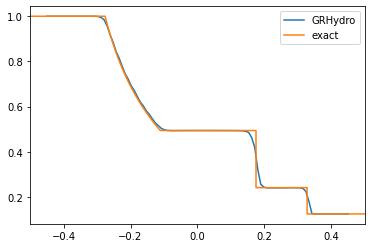

In [12]:
plt.plot(*rho_final.coordinates_meshgrid(), rho_final.data_xyz, label="GRHydro")
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
#plt.ylim(0.1, 0.3)
plt.legend()
plt.show()

## Alternative Method
This method can only be used with simulations that used only one refinement level (i.e., a uniform grid) and using only 1 MPI process.

In [13]:
#[iterazione][refinement level][component number]
rho[0][0][0].data

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   ,

In [14]:
rho[0][0][0].coordinates()[0].data

array([-0.4975, -0.495 , -0.4925, -0.49  , -0.4875, -0.485 , -0.4825,
       -0.48  , -0.4775, -0.475 , -0.4725, -0.47  , -0.4675, -0.465 ,
       -0.4625, -0.46  , -0.4575, -0.455 , -0.4525, -0.45  , -0.4475,
       -0.445 , -0.4425, -0.44  , -0.4375, -0.435 , -0.4325, -0.43  ,
       -0.4275, -0.425 , -0.4225, -0.42  , -0.4175, -0.415 , -0.4125,
       -0.41  , -0.4075, -0.405 , -0.4025, -0.4   , -0.3975, -0.395 ,
       -0.3925, -0.39  , -0.3875, -0.385 , -0.3825, -0.38  , -0.3775,
       -0.375 , -0.3725, -0.37  , -0.3675, -0.365 , -0.3625, -0.36  ,
       -0.3575, -0.355 , -0.3525, -0.35  , -0.3475, -0.345 , -0.3425,
       -0.34  , -0.3375, -0.335 , -0.3325, -0.33  , -0.3275, -0.325 ,
       -0.3225, -0.32  , -0.3175, -0.315 , -0.3125, -0.31  , -0.3075,
       -0.305 , -0.3025, -0.3   , -0.2975, -0.295 , -0.2925, -0.29  ,
       -0.2875, -0.285 , -0.2825, -0.28  , -0.2775, -0.275 , -0.2725,
       -0.27  , -0.2675, -0.265 , -0.2625, -0.26  , -0.2575, -0.255 ,
       -0.2525, -0.2

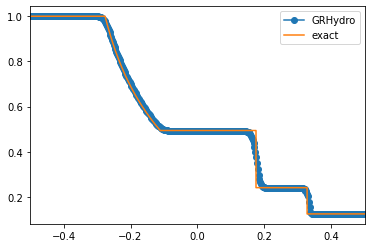

In [15]:
plt.plot(rho[200][0][0].coordinates()[0].data,rho[200][0][0].data, label="GRHydro", marker='o')
plt.plot(x_exact, rho_exact, label="exact")
plt.xlim(-0.5, 0.5)
plt.legend()
plt.show()